In [1]:
import os

In [2]:
path, dirs, files = next(os.walk("train/"))
files_count = len(files)
print(files_count)

18568


In [3]:
file_names = os.listdir("train/")
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10034.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10047.jpg', 'cat.10049.jpg', 'cat.1005.jpg', 'cat.10050.jpg', 'cat.10051.jpg', 'cat.10053.jpg', 'cat.10054.jpg', 'cat.10055.jpg', 'cat.10056.jpg', 'cat.10058.jpg', 'cat.10059.jpg', 'cat.1006.jpg', 'cat.10060.jpg', 'cat.10061.jpg', 'cat.10062.jpg', 'cat.10063.jp

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from cv2 import imshow

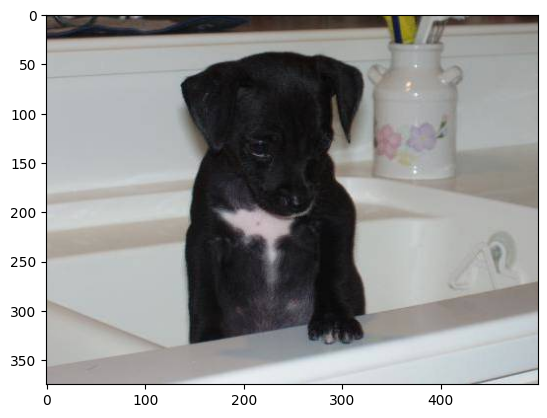

In [5]:
img = mpimg.imread("train/dog.8298.jpg")
imgplt = plt.imshow(img)

In [6]:
file_names = os.listdir("train/")

dog_count = 0
cat_count = 0

for img_names in file_names:
    name = img_names[0:3]

    if name == "dog":
        dog_count += 1
    else:
        cat_count += 1

print("Number of Dog images",dog_count)
print("Number of Cat images",cat_count)

Number of Dog images 10000
Number of Cat images 8568


In [7]:
os.mkdir("image_resized")

In [8]:
original_dir = ("train/")
resized_folder = ("image_resized/")

filenames = os.listdir(original_dir)

dog_images = [f for f in filenames if 'dog' in f]
cat_images = [f for f in filenames if 'cat' in f]

if len(dog_images) < 1000 or len(cat_images) < 1000:
    raise ValueError("Not enough dog or cat images. Make sure you have at least 1000 images of each type.")

for i in range(1000):
    img_path = os.path.join(original_dir, dog_images[i])
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    newImgPath = os.path.join(resized_folder, dog_images[i])
    img.save(newImgPath)

for i in range(1000):
    img_path = os.path.join(original_dir, cat_images[i])
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")
    newImgPath = os.path.join(resized_folder, cat_images[i])
    img.save(newImgPath)

print("Resizing and saving completed for 1000 dog images and 1000 cat images.")

Resizing and saving completed for 1000 dog images and 1000 cat images.


In [9]:
file_names = os.listdir("image_resized/")

labels = []

for imgname in file_names:
    patname = imgname[0:3]
    if patname == "dog":
        labels.append(1)
    else:
        labels.append(0)

In [10]:
print(file_names[997:1004])

['cat.1471.jpg', 'cat.1472.jpg', 'cat.1473.jpg', 'dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.1000.jpg']


In [11]:
print(labels[997:1004])

[0, 0, 0, 1, 1, 1, 1]


In [12]:
import cv2
import glob

In [13]:
image_directory = "image_resized/"
image_extension = ["jpg", "png"]

files = []

[files.extend(glob.glob(image_directory + "*." + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [14]:
print(dog_cat_images[1])

[[[ 43  43  37]
  [ 47  47  41]
  [ 47  47  41]
  ...
  [185 205 210]
  [173 197 203]
  [164 192 199]]

 [[ 42  42  36]
  [ 46  46  40]
  [ 45  45  39]
  ...
  [180 200 205]
  [169 195 201]
  [167 195 202]]

 [[ 42  42  36]
  [ 44  44  38]
  [ 43  43  37]
  ...
  [172 192 197]
  [167 193 200]
  [171 198 208]]

 ...

 [[ 28  28  28]
  [ 25  25  25]
  [ 21  21  21]
  ...
  [ 17  24  39]
  [ 18  25  40]
  [ 37  44  59]]

 [[ 29  29  29]
  [ 26  26  26]
  [ 22  22  22]
  ...
  [ 18  25  40]
  [ 20  27  42]
  [ 34  41  56]]

 [[ 29  29  29]
  [ 25  25  25]
  [ 21  21  21]
  ...
  [ 37  44  59]
  [ 30  37  52]
  [ 23  30  45]]]


In [15]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [16]:
X = dog_cat_images
Y = np.asarray(labels)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
print(X_train_scaled.shape)

(1600, 224, 224, 3)


In [20]:
import tensorflow as tf
import tensorflow_hub as hub

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

input_shape = (224, 224, 3)
n_classes = 2

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()

C:\Users\nilgo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,264,322 (73.49 MB)

 Trainable params: 19,264,322 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.5074 - loss: 0.8006
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5561 - loss: 0.6759
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5955 - loss: 0.6633
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 3s/step - accuracy: 0.6239 - loss: 0.6438
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.6666 - loss: 0.6227


In [24]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 876ms/step - accuracy: 0.7475 - loss: 0.5645
Test Loss = 0.5867919325828552
Test Accuracy = 0.7200000286102295


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Dog image prediction:


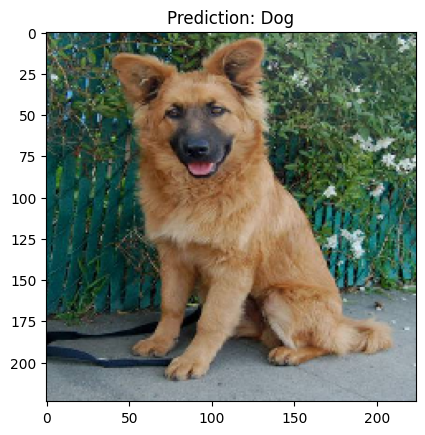

Cat image prediction:


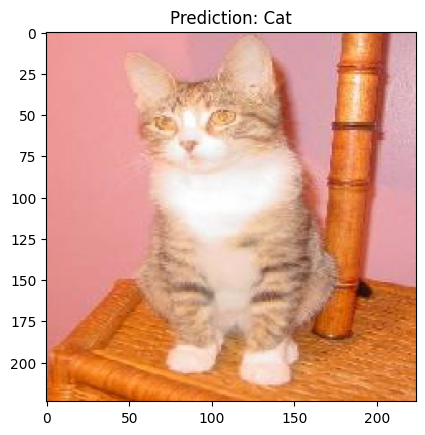

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image to [0, 1]
    return img_array

dog_image_path = 'test/dogs/dog.10014.jpg'
cat_image_path = 'test/cats/cat.10007.jpg'

dog_image = preprocess_image(dog_image_path)
cat_image = preprocess_image(cat_image_path)

dog_prediction = model.predict(dog_image)
cat_prediction = model.predict(cat_image)

def display_prediction(image_path, prediction):
    class_names = ['Cat', 'Dog']  # Update with your actual class names
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f'Prediction: {class_names[np.argmax(prediction)]}')
    plt.show()

print("Dog image prediction:")
display_prediction(dog_image_path, dog_prediction)

print("Cat image prediction:")
display_prediction(cat_image_path, cat_prediction)

In [30]:
model.save('saved model//Dog_vs_Cat_Classification.h5')